In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import pickle

In [3]:
x_treino, x_teste, y_treino, y_teste = pd.read_pickle('dados.pkl')

In [4]:
rf = GaussianNB()
rf.fit(x_treino, y_treino)
rf_pred = rf.predict(x_teste)

print(classification_report(y_teste, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



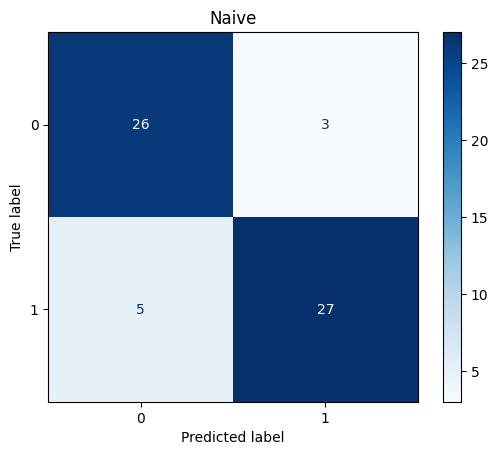

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_teste, rf_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive")
plt.show()

In [6]:
accuracy_score(y_teste, rf_pred)

In [20]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_teste, rf_pred).ravel()

In [7]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [8]:
param_distributions = {
    'var_smoothing': np.logspace(0, -9, num=10)  # valores de suavização em uma escala logarítmica
}


naive_random = GaussianNB()

random_search = RandomizedSearchCV(naive_random, param_distributions, n_iter=10, random_state=42)

random_search.fit(x_treino, y_treino)
rf_random_best = random_search.best_estimator_

y_pred_random_search = rf_random_best.predict(x_teste)

In [9]:
print(classification_report(y_teste, y_pred_random_search))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [10]:
accuracy_score(y_teste, y_pred_random_search)

In [21]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_teste, y_pred_random_search).ravel()

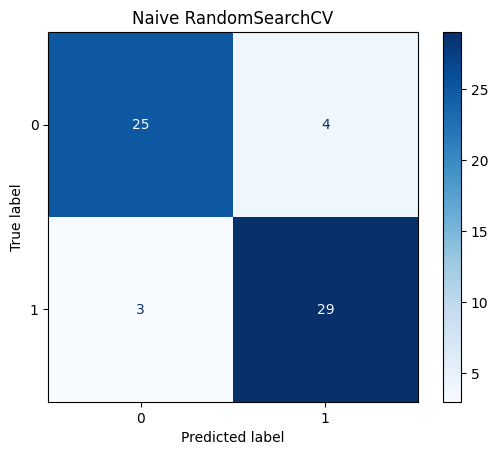

In [11]:
cm = confusion_matrix(y_teste, y_pred_random_search)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive RandomSearchCV")
plt.show()

In [12]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)  # valores de suavização em uma escala logarítmica
}

naive_grid = GaussianNB()

grid_search = GridSearchCV(naive_grid, param_grid, cv=5)

grid_search.fit(x_treino, y_treino)

tree = grid_search.best_estimator_
y_pred_grid = tree.predict(x_teste)

In [13]:
print(classification_report(y_teste, y_pred_grid))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [17]:
accuracy_score(y_teste, y_pred_grid)

In [22]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_teste, y_pred_random_search).ravel()

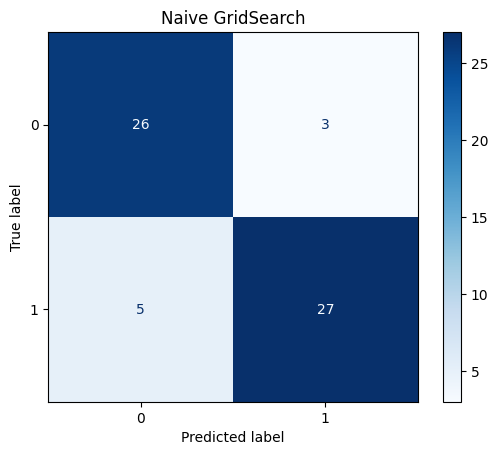

In [15]:
cm = confusion_matrix(y_teste, rf_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive GridSearch")
plt.show()

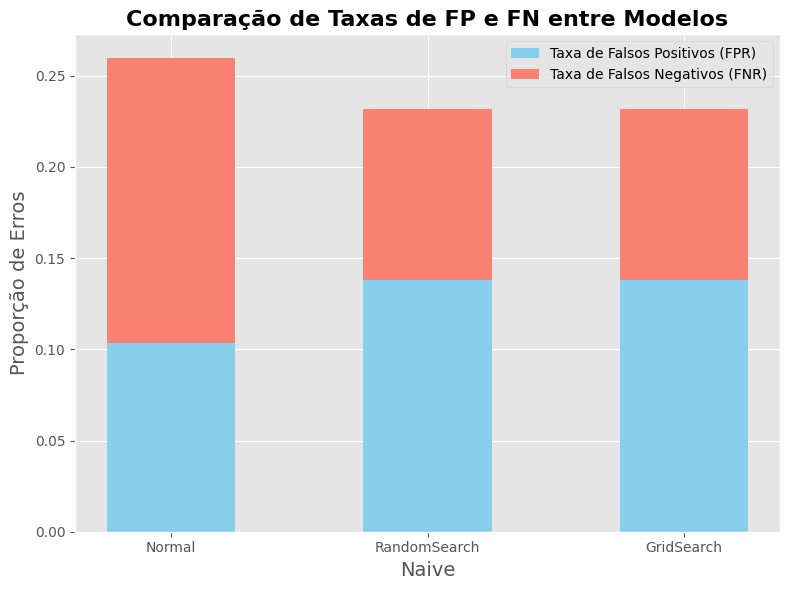

In [25]:
import numpy as np


fpr_modelos = [
    fp1 / (fp1 + tn1),
    fp2 / (fp2 + tn2),
    fp3 / (fp3 + tn3)
]

fnr_modelos = [
    fn1 / (fn1 + tp1),
    fn2 / (fn2 + tp2),
    fn3 / (fn3 + tp3)
]

modelos = ['Normal', 'RandomSearch', 'GridSearch']
cores = ['blue', 'green', 'red']

plt.style.use('ggplot')

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
bar_width = 0.5
bar_positions = np.arange(len(modelos))
plt.bar(bar_positions, fpr_modelos, color='skyblue', label='Taxa de Falsos Positivos (FPR)', width=bar_width)
plt.bar(bar_positions, fnr_modelos, bottom=fpr_modelos, color='salmon', label='Taxa de Falsos Negativos (FNR)', width=bar_width)

# Adicionar títulos e rótulos
plt.title('Comparação de Taxas de FP e FN entre Modelos', fontsize=16, fontweight='bold')

plt.xlabel('Naive', fontsize=14)

plt.ylabel('Proporção de Erros', fontsize=14)
plt.xticks(bar_positions, modelos)

# Adicionar uma legenda
plt.legend(loc='upper right', fontsize=10)


# Exibir o gráfico
plt.tight_layout()
plt.show()

In [33]:
print(fnr_modelos[1])
print(fnr_modelos[2])

0.09375
0.09375
